In [1]:
%%html
<img src='Flag/flag.jpg'>

# Belarus statistics and comparison

## Point of compare/argue: how far away Belarus is in economy field among other countries from the moment of USSR collapse ?
Countries were chosen from pool of former USSR(15 countries), including Belarus itself. 
In several plots, World and European Union averages were also compared.
All data was collected from open sources : 

* https://data.worldbank.org/;
* https://www.transparency.org/en/cpi;
* https://www.kaggle.com/unsdsn/world-happiness

and reshaped.

In [2]:
import pathlib
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt #, mpld3
import seaborn as sns

Importing 16(14+2) .csv tables: (1) GDP, (2) GDP per capita, (3.1) GDP PPP, (3.2) GDP PPP per employed, (4) GINI, (5) Foreign Exchange Reserves, (6) Inflation Rate, (7) Corruption perception index, (8) Unemployment, (9) Life length, (10) Life Expectancy at birth, (11) Population, (12) Doing Business Index, (13.1) Arms exports, (13.2) Arms imports and (14) World Happiness index.

In [3]:
path_gdp_nominal = pathlib.Path('Data source [csv]\\1 GDP nominal (US$).csv')
path_gdp_per_capita = pathlib.Path('Data source [csv]\\2 GDP per capita (US$).csv')
path_gdp_ppp = pathlib.Path('Data source [csv]\\3 GDP  PPP (international $).csv')
path_gdp_ppp_per_employed = pathlib.Path('Data source [csv]\\3 GDP per capita PPP (international $).csv')
path_gini = pathlib.Path('Data source [csv]\\4 GINI index (globalization).csv')
path_fer = pathlib.Path('Data source [csv]\\5 Foreign Exchange Reserves (US$).csv')
path_ir = pathlib.Path('Data source [csv]\\6 Inflation Rate.csv')
path_cpi = pathlib.Path('Data source [csv]\\7 Corruption perception index.csv')
path_unemployment = pathlib.Path('Data source [csv]\\8 Unemployment (% of total labor force).csv')
path_ll = pathlib.Path('Data source [csv]\\9 Life length.csv')
path_hele = pathlib.Path('Data source [csv]\\10 Life Expectancy.csv')
path_population = pathlib.Path('Data source [csv]\\11 Population.csv')
path_dbi = pathlib.Path('Data source [csv]\\12 Doing Business Index.csv')
path_ae = pathlib.Path('Data source [csv]\\13 Arms exports  (US$ m).csv')
path_ai = pathlib.Path('Data source [csv]\\13 Arms imports  (US$ m).csv')
path_happines = pathlib.Path('Data source [csv]\\14 World Happiness index.csv')

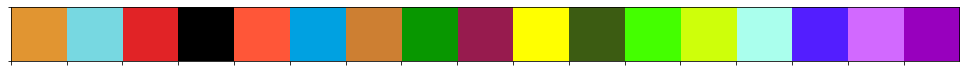

In [4]:
colors = ['#E19531', '#77D8E1', '#E12326', '#000000', '#FF5638',  
          '#00A1E1', '#CD7F32', '#089700', '#971B4E', '#FFFF00',
          '#3C5C12', '#44FF00', '#CEFF0A', '#AAFFED', '#531EFF',
          '#D269FF', '#9800BE']
sns.set_palette(sns.color_palette(colors))
sns.palplot(sns.color_palette(colors))

In [5]:
df_gdp = pd.read_csv(path_gdp_nominal, low_memory=False)
df_gdp = df_gdp.drop(['Country Code'], axis=1)
index_ru = df_gdp[df_gdp['Country Name'] == 'Russian Federation'].index
index_eu = df_gdp[df_gdp['Country Name'] == 'European Union'].index
index_wr = df_gdp[df_gdp['Country Name'] == 'World'].index
df_gdp = df_gdp.drop(index=[index_ru[0],index_eu[0], index_wr[0]], axis=0)
df_gdp

,Country Name,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Armenia,1.468317e+09,1.596969e+09,1.639492e+09,1.893726e+09,1.845482e+09,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,...,9.260285e+09,1.014211e+10,1.061932e+10,1.112147e+10,1.160951e+10,1.055334e+10,1.054614e+10,1.152746e+10,1.245794e+10,1.367280e+10
1,Azerbaijan,3.052468e+09,3.176703e+09,3.962735e+09,4.446370e+09,4.581247e+09,5.272617e+09,5.707720e+09,6.235857e+09,7.276013e+09,...,5.290270e+10,6.595163e+10,6.968394e+10,7.416444e+10,7.524429e+10,5.307437e+10,3.786752e+10,4.086556e+10,4.711294e+10,4.804765e+10
2,Belarus,1.397268e+10,1.475685e+10,1.412841e+10,1.522201e+10,1.213849e+10,1.273686e+10,1.235482e+10,1.459425e+10,1.782779e+10,...,5.722249e+10,6.175779e+10,6.568510e+10,7.552798e+10,7.881384e+10,5.645473e+10,4.772266e+10,5.472660e+10,6.003126e+10,6.308046e+10
3,Estonia,4.497824e+09,4.780170e+09,5.147711e+09,5.665917e+09,5.762048e+09,5.694070e+09,6.259258e+09,7.372457e+09,9.877637e+09,...,1.969361e+10,2.339153e+10,2.319271e+10,2.527141e+10,2.677347e+10,2.304886e+10,2.399645e+10,2.685910e+10,3.074716e+10,3.138695e+10
4,Georgia,2.693732e+09,3.094935e+09,3.510520e+09,3.613498e+09,2.800026e+09,3.057475e+09,3.219489e+09,3.395728e+09,3.991285e+09,...,1.224351e+10,1.510744e+10,1.648840e+10,1.718955e+10,1.762700e+10,1.495395e+10,1.514176e+10,1.624292e+10,1.759970e+10,1.774320e+10
5,Kazakhstan,2.037431e+10,2.103536e+10,2.216593e+10,2.213525e+10,1.687082e+10,1.829199e+10,2.215269e+10,2.463659e+10,3.083370e+10,...,1.480000e+11,1.930000e+11,2.080000e+11,2.370000e+11,2.210000e+11,1.840000e+11,1.370000e+11,1.670000e+11,1.790000e+11,1.800000e+11
6,Kyrgyz Republic,1.661019e+09,1.827571e+09,1.767864e+09,1.645964e+09,1.249061e+09,1.369688e+09,1.525116e+09,1.605643e+09,1.919008e+09,...,4.794358e+09,6.197766e+09,6.605140e+09,7.335028e+09,7.468097e+09,6.678178e+09,6.813092e+09,7.702935e+09,8.271109e+09,8.454620e+09
7,Lithuania,7.870782e+09,8.385109e+09,1.012027e+10,1.124036e+10,1.097288e+10,1.153921e+10,1.225250e+10,1.427836e+10,1.880258e+10,...,3.703446e+10,4.346613e+10,4.284254e+10,4.644206e+10,4.852600e+10,4.139240e+10,4.302197e+10,4.775091e+10,5.345517e+10,5.421932e+10
8,Latvia,5.770516e+09,5.952007e+09,6.508472e+09,7.145882e+09,7.518045e+09,7.934206e+09,8.334748e+09,9.529949e+09,1.173170e+10,...,2.380391e+10,2.849070e+10,2.817663e+10,3.027257e+10,3.138278e+10,2.709002e+10,2.773414e+10,3.027301e+10,3.431387e+10,3.411720e+10
9,Moldova,1.752980e+09,1.695122e+09,1.930081e+09,1.698718e+09,1.170783e+09,1.288429e+09,1.480674e+09,1.661818e+09,1.980907e+09,...,6.974960e+09,8.414361e+09,8.709165e+09,9.496685e+09,9.510219e+09,7.745232e+09,8.071481e+09,9.669760e+09,1.145741e+10,1.195544e+10


In [6]:
df_gdp = df_gdp.melt(id_vars=['Country Name'], var_name='year', value_name='GDP')
df_gdp['GDP'] = df_gdp['GDP'] / 1000000

[]

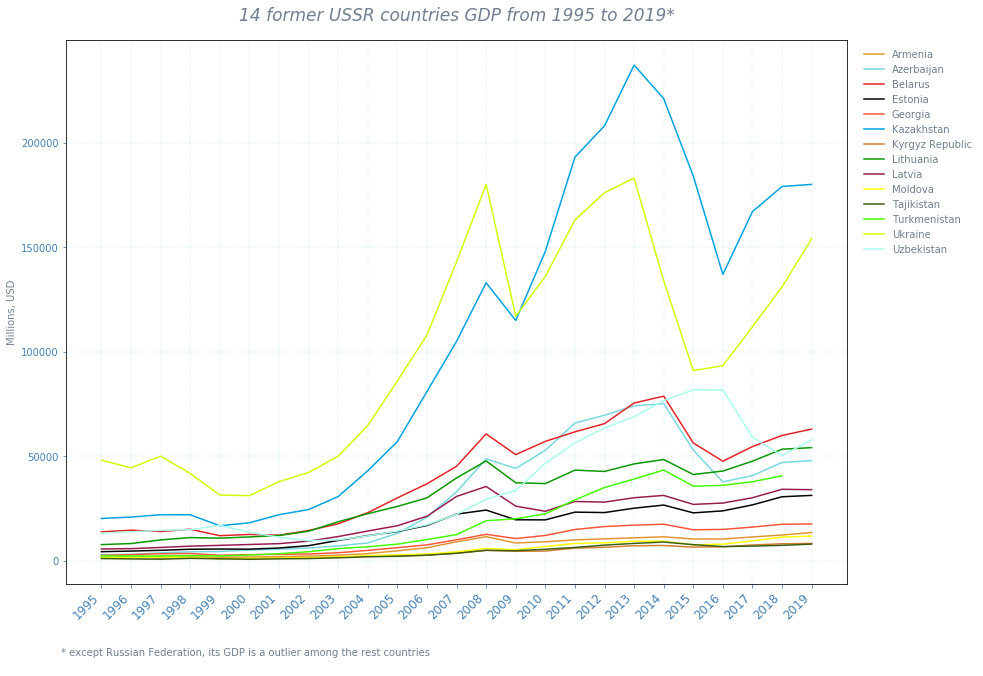

In [7]:
plt.figure(figsize=(14,10))
gdp = sns.lineplot(x='year', y='GDP', hue='Country Name', data=df_gdp)

for item in gdp.get_xticklabels():
    item.set_rotation(45)    
plt.xticks(ha='right',fontweight='light',fontsize='large')

handles, labels = gdp.get_legend_handles_labels()
legend = gdp.legend(handles=handles[1:], labels=labels[1:],bbox_to_anchor=(1.01, 1), loc='upper left', frameon=False)
for text in legend.get_texts():
    text.set_color('slategrey')


plt.title(f'14 former USSR countries GDP from 1995 to 2019*',fontsize=17,fontstyle='italic', color='slategrey', y=1.025)
plt.ylabel("Millions, USD")
plt.xlabel(None)

gdp.yaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')
gdp.xaxis.grid(linestyle='--', linewidth='0.2', color='skyblue')
gdp.tick_params(axis='x', colors='steelblue')
gdp.tick_params(axis='y', colors='steelblue')
gdp.yaxis.label.set_color('slategrey')
matplotlib.rc('axes',edgecolor='slategrey')

plt.figtext(.12, .01,("\n"*4) +  """* except Russian Federation, its GDP is a outlier among the rest countries\n""", color='slategrey', weight='light' ) 
gdp.plot()

###############################################################################################################################

In [8]:
df_gdp_pc = pd.read_csv(path_gdp_per_capita, low_memory=False)
df_gdp_pc = df_gdp_pc.drop(['Country Code'], axis=1)
df_gdp_pc = df_gdp_pc.melt(id_vars=['Country Name'], var_name='year', value_name='GDP')
df_gdp_pc

,Country Name,year,GDP
0,Armenia,1995,456.375049
1,Azerbaijan,1995,397.198116
2,Belarus,1995,1370.676559
3,Estonia,1995,3130.807094
4,Georgia,1995,578.336763
...,...,...,...
420,Ukraine,2019,3659.031312
421,Uzbekistan,2019,1724.841134
422,Russian Federation,2019,11584.995380
423,European Union,2019,35460.250430


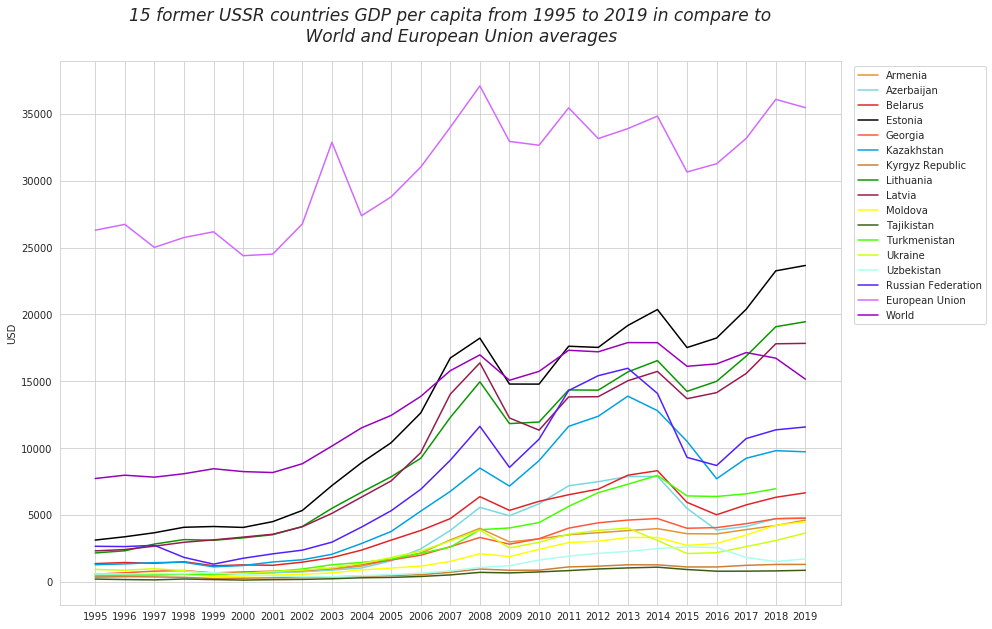

In [9]:
with sns.axes_style('whitegrid'):  
    plt.figure(figsize=(14,10))
    df_gdp_per_capita = sns.lineplot(x='year', y='GDP', hue='Country Name', data=df_gdp_pc)
    handles, labels = df_gdp_per_capita.get_legend_handles_labels()
    plt.xlabel(None)
    plt.ylabel("USD")
    plt.title('''15 former USSR countries GDP per capita from 1995 to 2019 in compare to
    World and European Union averages''',fontsize=17,fontstyle='italic', y=1.025)
    plt.legend(handles=handles[1:], labels=labels[1:],bbox_to_anchor=(1.01, 1), loc='upper left', edgecolor=None)

###############################################################################################################################

In [10]:
df_gdp_ppp = pd.read_csv(path_gdp_ppp, low_memory=False)
df_gdp_ppp = df_gdp_ppp.drop(['Country Code'], axis=1).set_index('Country Name')
df_gdp_ppp_pc = pd.read_csv(path_gdp_ppp_per_employed, low_memory=False)
df_gdp_ppp_pc = df_gdp_ppp_pc.drop(['Country Code'], axis=1).set_index('Country Name')

In [11]:
def percentage_dimension(source):
    stack_for_diff = []
    data = list(df_gdp_ppp.loc[source, :])
    for i in range(1,len(df_gdp_ppp.loc[source,:])):
        stack_for_diff.append((data[i] / data[i-1]))
    return stack_for_diff

In [12]:
def gdppp_95_04(source=list):
    gdppp_by_95_04 = source[0:9].copy()
    return round((sum(gdppp_by_95_04) / len(gdppp_by_95_04) - 1) * 100, 2)


def gdppp_05_19(source=list):
    gdppp_by_05_19 = source[9:].copy()
    return round((sum(gdppp_by_05_19) / len(gdppp_by_05_19) - 1) * 100, 2)

In [13]:
def country_gdp_ppp_95_04():
    countries = list(df_gdp_ppp.index)
    countries_stack = []
    for country in countries:
        country_gdp = gdppp_95_04(percentage_dimension(country))
        countries_stack.append(country_gdp)
    return countries_stack


def country_gdp_ppp_05_19():
    countries = list(df_gdp_ppp.index)
    countries_stack = []
    for country in countries:
        if country == 'Turkmenistan':
            country_gdp = gdppp_05_19(percentage_dimension(country)[0:-2]) # no Turkmenistan data in 2019
            countries_stack.append(country_gdp)
        else:
            country_gdp = gdppp_05_19(percentage_dimension(country)[0:-1])
            countries_stack.append(country_gdp)
    return countries_stack  


print(country_gdp_ppp_95_04())
print(country_gdp_ppp_05_19())

[10.12, 10.28, 8.65, 8.87, 8.27, 8.12, 7.24, 8.35, 8.18, 3.66, 6.85, 6.07, 4.91, 6.29, 6.7, 0.51, 4.9]
[7.89, 9.81, 5.99, 6.74, 8.39, 7.05, 7.66, 6.24, 5.81, 7.37, 7.93, 10.08, 4.26, 7.72, 8.16, 3.45, 5.49]


In [14]:
df_gdp_ppp['1995-2004'] = country_gdp_ppp_95_04()
df_gdp_ppp['2005-2019'] = country_gdp_ppp_05_19()
df_gdp_ppp_final = df_gdp_ppp.loc[:,['1995-2004','2005-2019']]
df_gdp_ppp_final

,1995-2004,2005-2019
Country Name,,
Armenia,10.12,8.00
Azerbaijan,10.28,9.38
Belarus,8.65,5.81
Estonia,8.87,6.77
Georgia,8.27,8.30
Kazakhstan,8.12,7.00
Kyrgyz Republic,7.24,7.57
Lithuania,8.35,6.23
Latvia,8.18,5.71


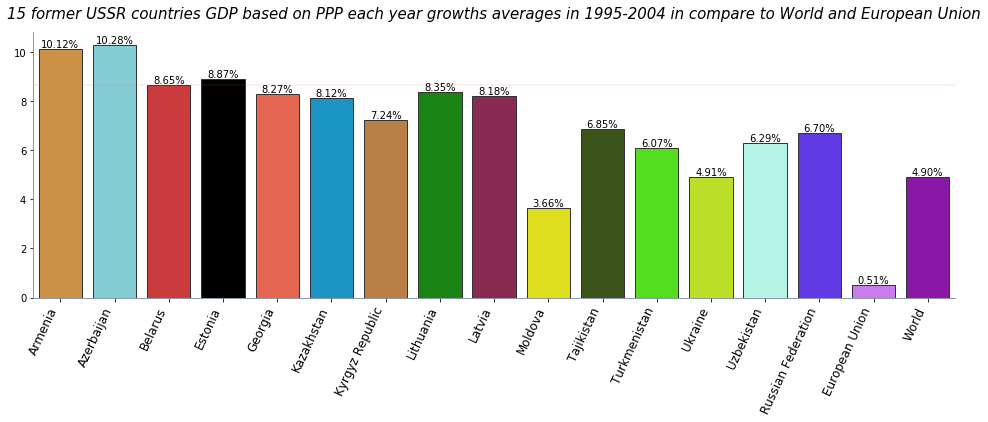

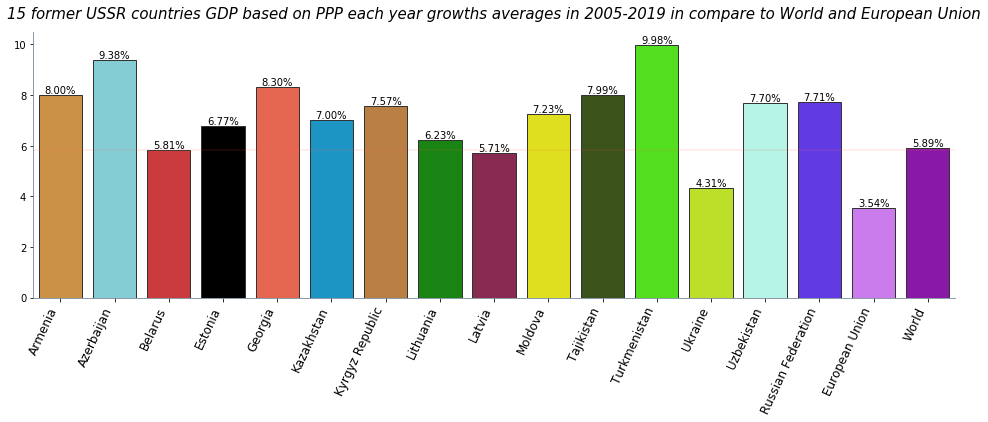

In [15]:
def plot_gdp(source,data, value, indicator):
    plt.figure(figsize=(15,6))
    gdp_ppp_plot = sns.barplot(x = source.index, y = source[data], edgecolor=".2")
    for item in gdp_ppp_plot.get_xticklabels():
        item.set_rotation(65)
    plt.xticks(ha='right',fontweight='light',fontsize='large')
    [plt.gca().spines[loc].set_visible(False) for loc in ['top', 'right']]
    for a in gdp_ppp_plot.patches:
        gdp_ppp_plot.annotate('{:.2f}'.format(a.get_height()) + value, (a.get_x()+0.4, a.get_height()),
                              ha='center', va='bottom', color= 'black') 
    gdp_ppp_plot.axhline(y = source.loc['Belarus',data], zorder=1, linewidth=0.2, color='tomato')
    plt.xlabel(None)    
    plt.ylabel(None)
    plt.title(f'15 former USSR countries GDP based on {indicator} in {data}'
              f' in compare to World and European Union',fontsize=15,fontstyle='italic', y=1.03)
    plt.tight_layout()

    
plot_gdp(df_gdp_ppp_final, '1995-2004', '%', 'PPP each year growths averages')
plot_gdp(df_gdp_ppp_final, '2005-2019', '%', 'PPP each year growths averages')

In [16]:
#fig = plt.gcf()
#tooltip = mpld3.plugins.PointLabelTooltip(fig, labels=list(df_gdp_ppp_pe_final['1994-2004']))
#mpld3.plugins.connect(fig, tooltip)

###############################################################################################################################

In [17]:
def average_calc_list(source):
    stack_for_avg = []
    for country in source:
        country_avg = df_gdp_ppp_pc.apply(lambda x: x[country].mean(), axis=0).mean()
        stack_for_avg.append(country_avg)
    return stack_for_avg


df_gdp_ppp_pc['1994-2015'] = average_calc_list(list(df_gdp_ppp_pc.index))
average_gdp_ppp_pc = df_gdp_ppp_pc[['1994-2015']]

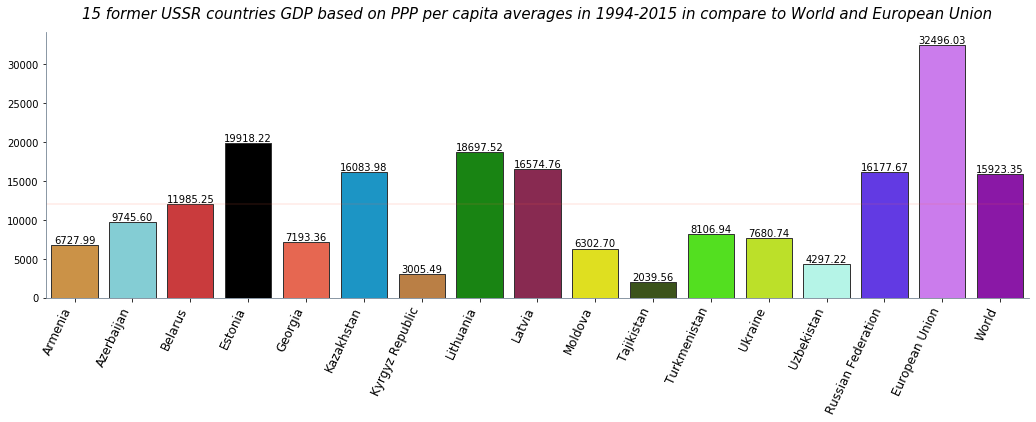

In [18]:
plot_gdp(average_gdp_ppp_pc , '1994-2015', '','PPP per capita averages')

###############################################################################################################################

In [5]:
df_gdp_gini = pd.read_csv(path_gini, low_memory=False)
df_gdp_gini = df_gdp_gini.drop(['Country Name'], axis=1)

In [6]:
df = df_gdp_gini.loc[:,['Country Code','2005','2010','2015']]
df = df.drop(index=[1,10,11,13])

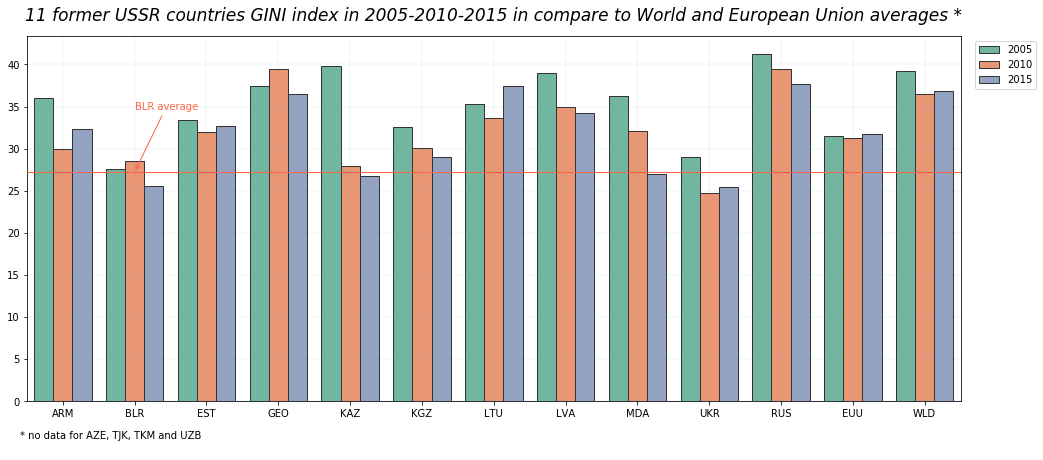

In [7]:
gini_melt = pd.melt(df, id_vars='Country Code')
plt.figure(figsize=(15,6))
df_gini = sns.barplot(x='Country Code', y='value', hue='variable', data=gini_melt, palette="Set2", edgecolor=".2")
by_avg = gini_melt[gini_melt['Country Code'] == 'BLR'].value.mean()


handles, labels = df_gini.get_legend_handles_labels()
plt.xlabel(None)
plt.ylabel(None)
plt.title('''11 former USSR countries GINI index in 2005-2010-2015 in compare to World and European Union averages *''',fontsize=17,fontstyle='italic', y=1.025)
plt.legend(handles=handles[:], labels=labels[:],bbox_to_anchor=(1.01, 1), loc='upper left', edgecolor=None)
df_gini.yaxis.grid(linestyle='--', linewidth='0.15', color='cadetblue')
df_gini.xaxis.grid(linestyle='--', linewidth='0.15', color='cadetblue')
df_gini.axhline(y = by_avg, zorder=5, linewidth=1, color='tomato', label="BLR Average")
plt.figtext(.05, -.05,("\n"*4) +  """* no data for AZE, TJK, TKM and UZB\n""", color='black', weight='light' ) 
df_gini.annotate(('BLR average'), 
                 xy=(1, by_avg),
                 xytext=(1, gini_melt.iloc[1,2]+7),
                 arrowprops=dict(arrowstyle="->",connectionstyle="arc3", color = 'tomato'), color = 'tomato')
plt.tight_layout()


###############################################################################################################################

In [105]:
df_fer = pd.read_csv(path_fer, low_memory=False)
df_fer = df_fer.drop(['Country Code'], axis=1).set_index('Country Name')
df_fer = df_fer.drop(index=['Russian Federation','European Union', 'World', 'Kazakhstan', 'Ukraine', 'Uzbekistan'])

In [106]:
year_list = list(df_fer.columns)
for year in year_list:
    df_fer[year] = df_fer[year] / 1000000

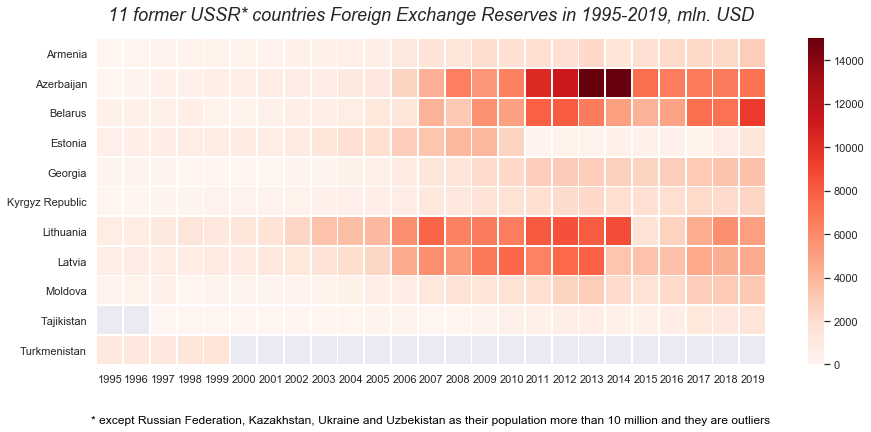

In [257]:
f, ax = plt.subplots(figsize=(15, 6))
sns.heatmap(df_fer, annot=False, robust=False,cmap='Reds', linewidths=.8, ax=ax, vmin=0, vmax=15000)
plt.ylabel(None)
plt.title('''11 former USSR* countries Foreign Exchange Reserves in 1995-2019, mln. USD''',fontsize=18,fontstyle='italic', pad=18)
plt.figtext(.12, -.01,("\n"*2) +  """* except Russian Federation, Kazakhstan, Ukraine and Uzbekistan as their population more than 10 million and they are outliers""", color='black', weight='light' ) 
plt.show()

###############################################################################################################################

In [248]:
df_ir = pd.read_csv(path_ir, low_memory=False)
df_ir = df_ir.drop(['Country Code'], axis=1).set_index('Country Name')

In [249]:
df_ir = df_ir.loc[:,['2000','2005','2010','2015','2016','2017','2018','2019']]
df_ir = df_ir.drop(['Tajikistan', 'Turkmenistan', 'Uzbekistan'])
df_ir = df_ir.round(2)

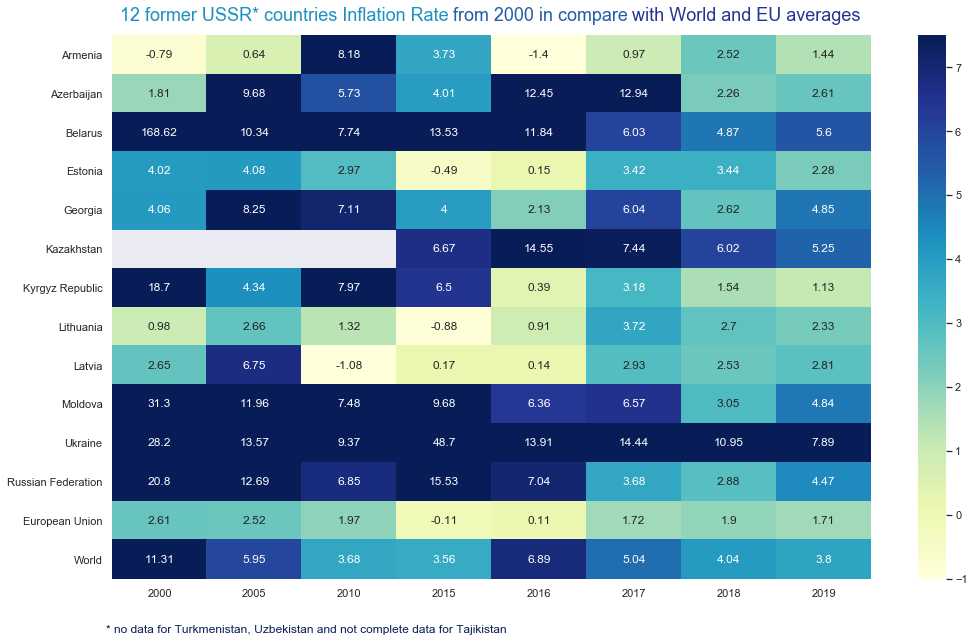

In [299]:
f, ax = plt.subplots(figsize=(17, 10))
sns.heatmap(df_ir, annot=True, robust=False,cmap='YlGnBu', ax=ax, fmt='g', vmin= -1, vmax=7.5)
plt.ylabel(None)
#plt.title('12 former USSR* countries Inflation Rate from 2000 in compare with World and EU averages',fontsize=18, fontstyle='italic', pad=18)
plt.figtext(.12, .05,("\n"*2) +  """* no data for Turkmenistan, Uzbekistan and not complete data for Tajikistan""", color='#081d58', weight='light' ) 
plt.figtext(0.40, 0.9, '12 former USSR* countries Inflation Rate', fontsize=18, color='#1d91c0', ha ='right')
plt.figtext(0.55, 0.9, 'with World and EU averages', fontsize=18, color='#253494', ha ='left')
plt.figtext(0.475, 0.9, 'from 2000 in compare', fontsize=18, color='#225ea8', ha ='center')
plt.show()

###############################################################################################################################